# Data Visualization

We begin by studying the smallest of the two biggest datasets because those datasets are the less specific and they hoard data on every project.

In [50]:
import pandas as pd
import numpy as np
import csv

# data=pd.read_csv("D:/Utilisateurs/Bastien/Documents/Cours/CentraleSupelec/Electifs/Machine Learning/Projet/kickstarter-analysis/Datasets/big/december2016.csv",nrows=10000,encoding="unicode_escape")

We realized that some rows in the file were corrupted. A cleansing proved to be necessary...

In [51]:
# data1=[]

# with open("D:/Utilisateurs/Bastien/Documents/Cours/CentraleSupelec/Electifs/Machine Learning/Projet/kickstarter-analysis/Datasets/big/december2016.csv",'r') as sourceFile:
#     reader=csv.reader(sourceFile)
#     with open(,'w') as destinationFile:
#         for row in reader:
#             row=';'.join(row)
#             row=row.rstrip(';')
#             row=row.split(';')
#             if len(list(row))==13:
#                 data1.append(row)
                
# data1=pd.DataFrame(data1)
# head=data1.iloc[0,:]
# data=data1.iloc[1:,:]
# data.columns=head

# #Let's save the dataset in a new file
# data.to_csv("D:/Utilisateurs/Bastien/Documents/Cours/CentraleSupelec/Electifs/Machine Learning/Projet/kickstarter-analysis/Datasets/big/december2016_cleansed.csv")

Only a few of the columns are interesting at first. We can remove the dates and IDs for instance.

In [52]:
data=pd.read_csv("D:/Utilisateurs/Bastien/Documents/Cours/CentraleSupelec/Electifs/Machine Learning/Projet/kickstarter-analysis/Datasets/big/december2016_cleansed.csv",nrows=10000)
data.columns=['Row number','ID','name','category',"main_category","currency","deadline","goal","launched","pledged","state","backers","country","usd_pledged"]
dataEssential=data[['category',"main_category","currency","goal","pledged","state","backers","country","usd_pledged"]]
print(dataEssential)

               category main_category currency      goal    pledged  \
0                Poetry    Publishing      GBP    1000.0       0.00   
1        Narrative Film  Film & Video      USD   45000.0     220.00   
2                 Music         Music      USD    5000.0       1.00   
3          Film & Video  Film & Video      USD   19500.0    1283.00   
4           Restaurants          Food      USD   50000.0   52375.00   
5                  Food          Food      USD    1000.0    1205.00   
6                Drinks          Food      USD   25000.0     453.00   
7        Product Design        Design      USD  125000.0    8233.00   
8           Documentary  Film & Video      USD   65000.0    6240.57   
9            Nonfiction    Publishing      CAD    2500.0       0.00   
10           Indie Rock         Music      USD   12500.0   12700.00   
11               Crafts        Crafts      USD    5000.0       0.00   
12                Games         Games      USD  200000.0       0.00   
13    

Let's try and display the scatter matrix of the main features. Maybe we'll recognize some patterns. 
We tried but it did not work. We must take each column separately and display what's interesting

## Categories plots

### Display

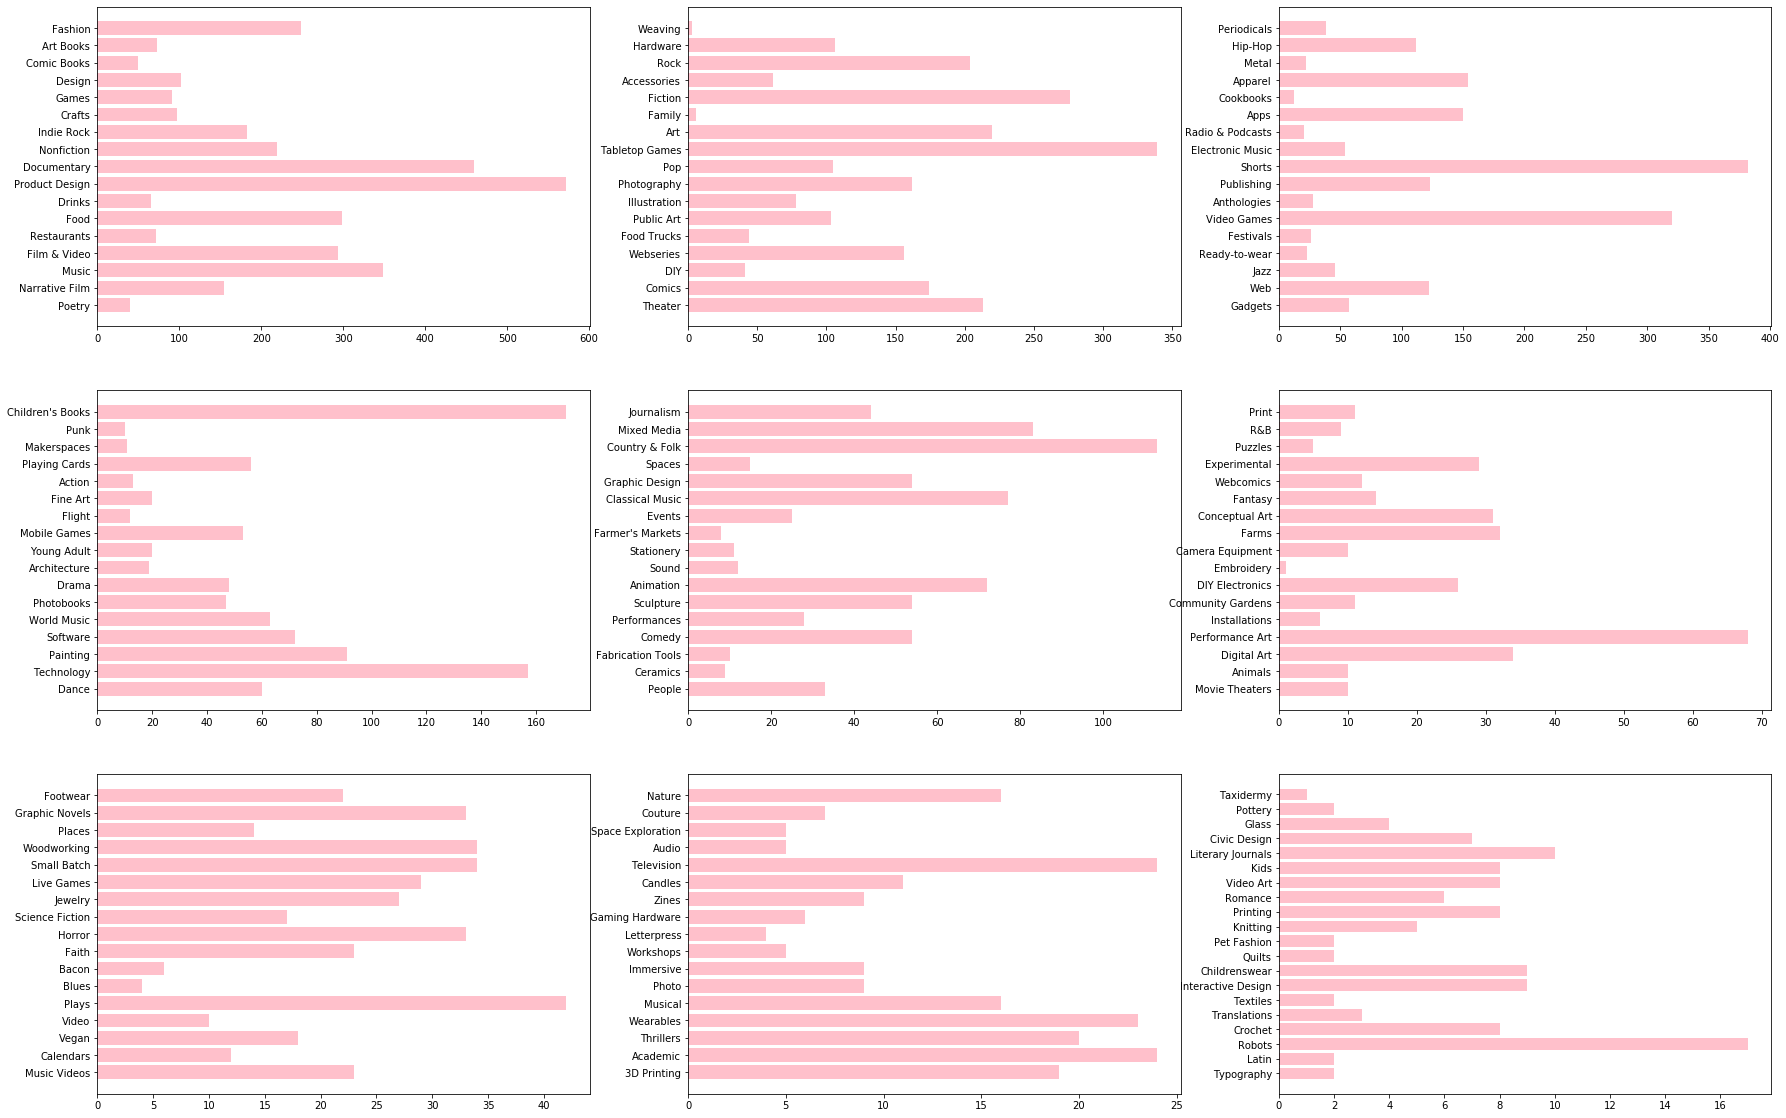

In [53]:
import matplotlib.pyplot as plt

listCategories=np.array(dataEssential["category"])
dictCategories={}

for x in listCategories:
    if x not in dictCategories.keys():
        dictCategories[x]=1
    else:
        dictCategories[x]+=1



#We divide the dictionary in 12 dictionaries for the plots to be more readable
plotDict={}
everyKey=list(dictCategories.keys())
numberKeys=len(everyKey)
interval=numberKeys//9

for i in range(9):
    if i<8:
        keys=everyKey[interval*i:interval*(i+1)]
    else:
        keys=everyKey[interval*i:]
    plotDict[i]={key:dictCategories[key] for key in keys}

fig=plt.figure(figsize=(30,20))

## FIRST METHOD


for i in range(9):
    number=330+i+1
    plt.subplot(number)
    plt.barh(list(plotDict[i].keys()), list(plotDict[i].values()), color='pink')
plt.show()

##SECOND METHOD

# gs = fig.add_gridspec(3,3)

# for i in range(9):
#     ax = fig.add_subplot(gs[i//3, i%3])
#     plt.barh(list(plotDict[i].keys()), list(plotDict[i].values()), color='pink')
# plt.show()


Now, it seems more adapted to display only the 15 most represented main categories.

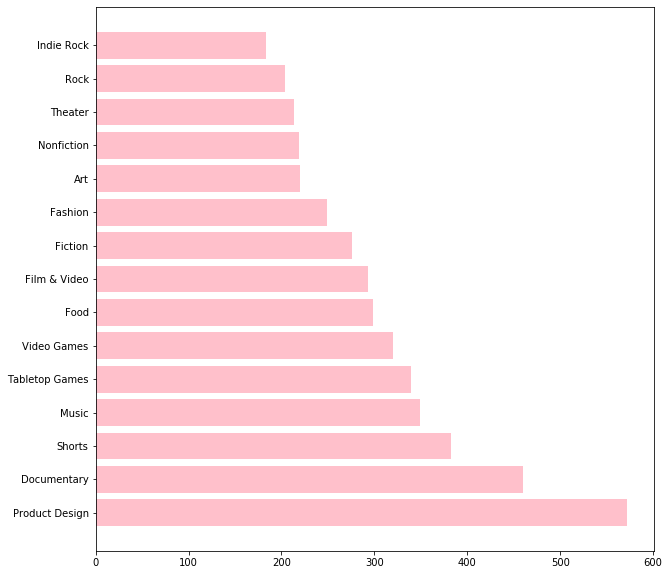

In [54]:
listTuples=[(x,dictCategories[x]) for x in dictCategories.keys()]
rankedCategories=sorted(listTuples,key=lambda category : category[1], reverse=True)
dictBestCateg=dict(rankedCategories[:15])

fig=plt.figure(figsize=(10,10))
plt.barh(list(dictBestCateg.keys()), list(dictBestCateg.values()), color='pink')
plt.show()

Now, instead of just displaying the number of projects in each of the 15 top categories, it would be better to display the 10 categories with the best rate of success.

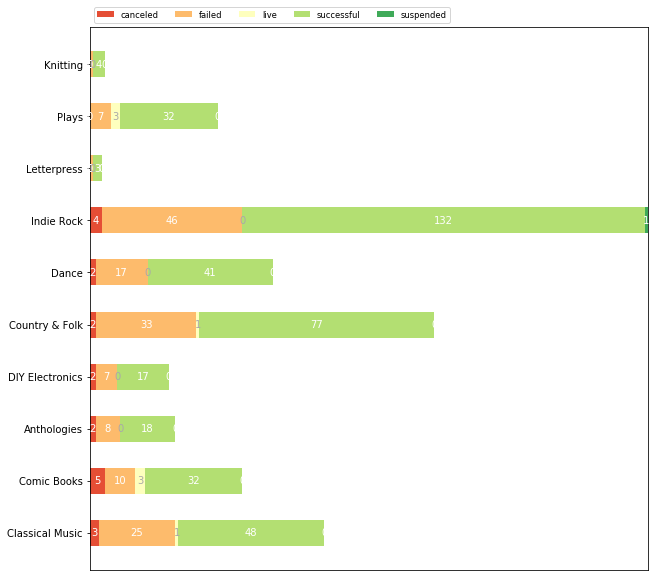

In [55]:
# We have the 5 possible states for a project ['canceled' 'failed' 'live' 'successful' 'suspended'] 
listCategState=np.array(dataEssential[["category",'state']])
dictCategState={}

helper={'canceled':[1,0,0,0,0] , 'failed':[0,1,0,0,0] , 'live':[0,0,1,0,0] , 'successful' :[0,0,0,1,0] , 'suspended':[0,0,0,0,1]}

for x in listCategState:
    if x[0] not in dictCategState.keys():
        dictCategState[x[0]]=helper[x[1]]
    else:
        temp=dictCategState[x[0]]
        dictCategState[x[0]]=list(map(sum, zip(temp, helper[x[1]]))) #sum of two lists element-wise, nothing more

listTuples=[(x,dictCategState[x]) for x in dictCategState.keys()]
rankedCategories=sorted(listTuples,key=lambda category : category[1][3]/sum(category[1]), reverse=True)
dictBestCateg=dict(rankedCategories[:10])
        
def survey(results,category_names):
    """
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(dictBestCateg,['canceled','failed','live','successful','suspended'] )
plt.show()

We notice that the categories displaying the greatest success rates are not necessarily the most represented categories on Kickstarter.
Let's keep on displaying the same kind of plots, but with the main categories this time !

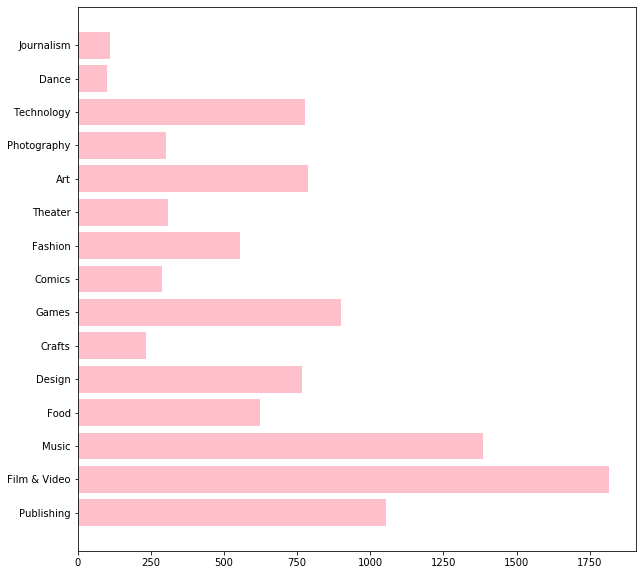

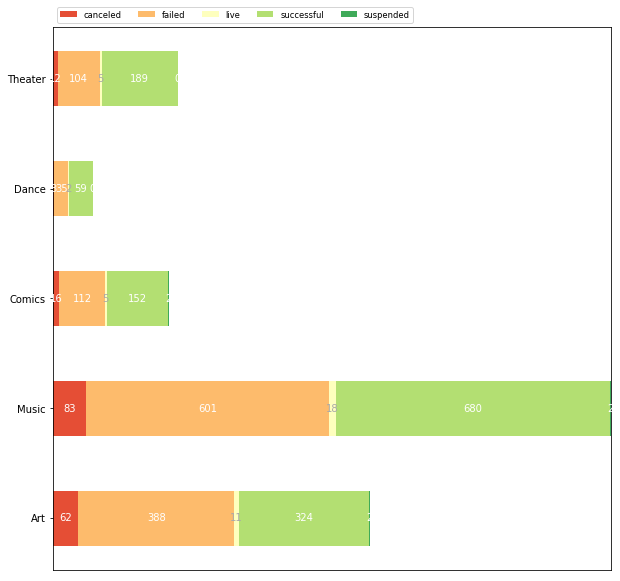

In [56]:
listMainCateg=np.array(dataEssential["main_category"])
dictMainCateg={}

for x in listMainCateg:
    if x not in dictMainCateg.keys():
        dictMainCateg[x]=1
    else:
        dictMainCateg[x]+=1

##      
listCategState=np.array(dataEssential[["main_category",'state']])
dictCategState={}

helper={'canceled':[1,0,0,0,0] , 'failed':[0,1,0,0,0] , 'live':[0,0,1,0,0] , 'successful' :[0,0,0,1,0] , 'suspended':[0,0,0,0,1]}

for x in listCategState:
    if x[0] not in dictCategState.keys():
        dictCategState[x[0]]=helper[x[1]]
    else:
        temp=dictCategState[x[0]]
        dictCategState[x[0]]=list(map(sum, zip(temp, helper[x[1]]))) #sum of two lists element-wise, nothing more

listTuples=[(x,dictCategState[x]) for x in dictCategState.keys()]
rankedCategories=sorted(listTuples,key=lambda category : category[1][3]/sum(category[1]), reverse=True)
dictBestCateg=dict(rankedCategories[:5])

## Display
fig=plt.figure(figsize=(10,10))
plt.barh(list(dictMainCateg.keys()), list(dictMainCateg.values()), color='pink')
plt.show()

survey(dictBestCateg,['canceled','failed','live','successful','suspended'] )
plt.show()

### Results

These results could help add a ponderation in our future predictors. For a given category for a project, we could modulate our prediction with the success rate of the category of this very project.

## Currency plots

### Display

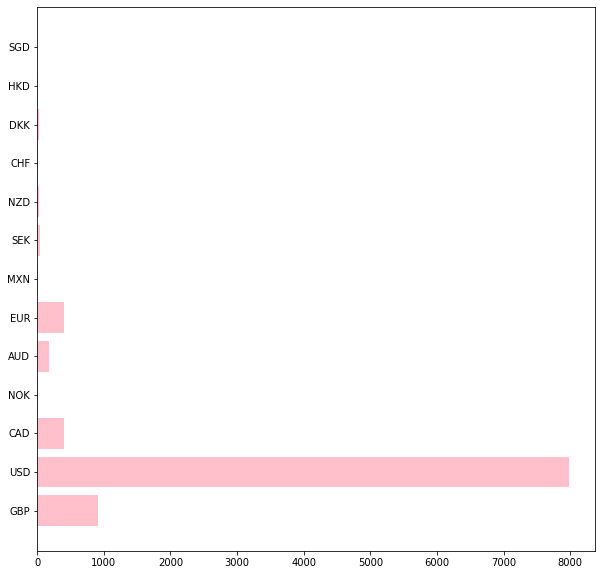

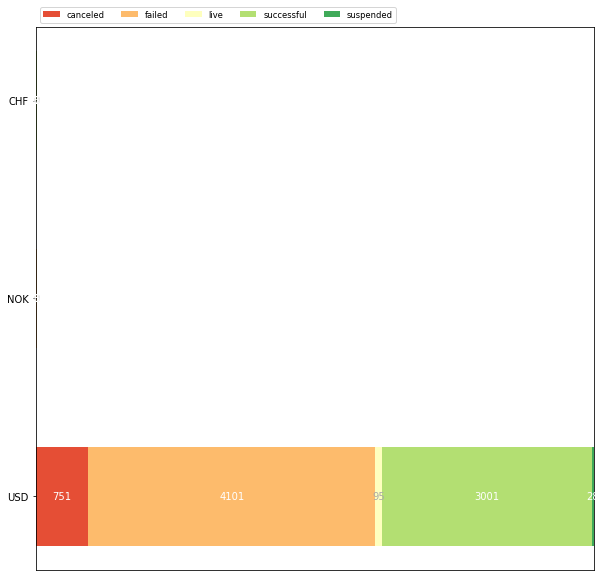

In [57]:
listMainCurrency=np.array(dataEssential["currency"])
dictMainCurrency={}

for x in listMainCurrency:
    if x not in dictMainCurrency.keys():
        dictMainCurrency[x]=1
    else:
        dictMainCurrency[x]+=1

##      
listCurrencyState=np.array(dataEssential[["currency",'state']])
dictCurrencyState={}

helper={'canceled':[1,0,0,0,0] , 'failed':[0,1,0,0,0] , 'live':[0,0,1,0,0] , 'successful' :[0,0,0,1,0] , 'suspended':[0,0,0,0,1]}

for x in listCurrencyState:
    if x[0] not in dictCurrencyState.keys():
        dictCurrencyState[x[0]]=helper[x[1]]
    else:
        temp=dictCurrencyState[x[0]]
        dictCurrencyState[x[0]]=list(map(sum, zip(temp, helper[x[1]]))) #sum of two lists element-wise, nothing more

listTuples=[(x,dictCurrencyState[x]) for x in dictCurrencyState.keys()]
rankedCategories=sorted(listTuples,key=lambda category : category[1][3]/sum(category[1]), reverse=True)
dictBestCurrency=dict(rankedCategories[:3])

## Display
fig=plt.figure(figsize=(10,10))
plt.barh(list(dictMainCurrency.keys()), list(dictMainCurrency.values()), color='pink')
plt.show()

survey(dictBestCurrency,['canceled','failed','live','successful','suspended'] )
plt.show()

### Results

It is clearly not relevant to categorize by currency, though CHF and NOK have better success rates. Projects funded with USD blatantly outnumber any other currency.

## Countries plots
### Display

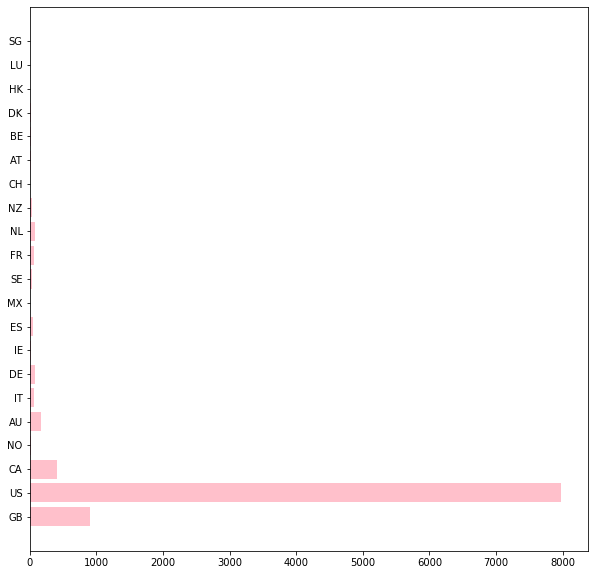

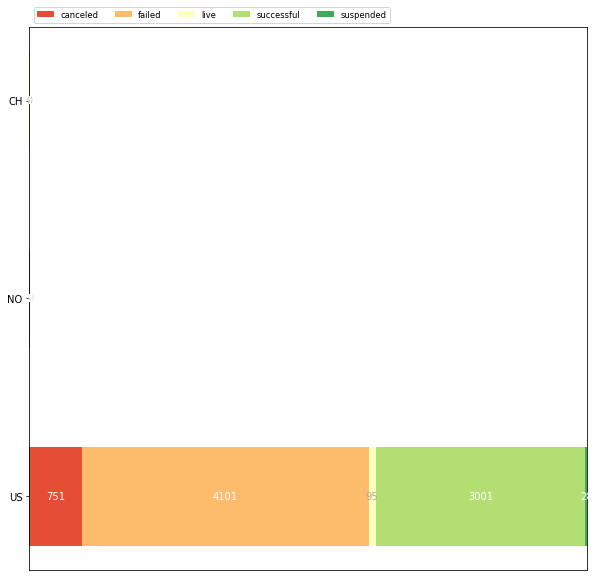

In [58]:
listMainCountry=np.array(dataEssential["country"])
dictMainCountry={}

for x in listMainCountry:
    if x not in dictMainCountry.keys():
        dictMainCountry[x]=1
    else:
        dictMainCountry[x]+=1

##      
listCountryState=np.array(dataEssential[["country",'state']])
dictCountryState={}

helper={'canceled':[1,0,0,0,0] , 'failed':[0,1,0,0,0] , 'live':[0,0,1,0,0] , 'successful' :[0,0,0,1,0] , 'suspended':[0,0,0,0,1]}

for x in listCountryState:
    if x[0] not in dictCountryState.keys():
        dictCountryState[x[0]]=helper[x[1]]
    else:
        temp=dictCountryState[x[0]]
        dictCountryState[x[0]]=list(map(sum, zip(temp, helper[x[1]]))) #sum of two lists element-wise, nothing more

listTuples=[(x,dictCountryState[x]) for x in dictCountryState.keys()]
rankedCategories=sorted(listTuples,key=lambda category : category[1][3]/sum(category[1]), reverse=True)
dictBestCountry=dict(rankedCategories[:3])

## Display
fig=plt.figure(figsize=(10,10))
plt.barh(list(dictMainCountry.keys()), list(dictMainCountry.values()), color='pink')
plt.show()

survey(dictBestCountry,['canceled','failed','live','successful','suspended'] )
plt.show()

### Results

We can jump to the exact same conclusions as with currencies. Our data does not seem sufficiently sparse to consider these features. USD and US are the features of a vast majority of projects.

## Number of backers

Now, it would be nice to see a histogram displaying the number of backers for any project and then to seperate successful projects from other, always through the spectrum of the number of backers.

### Display

First, without seperating the projects by categories (a category is assigned in the "state" column)

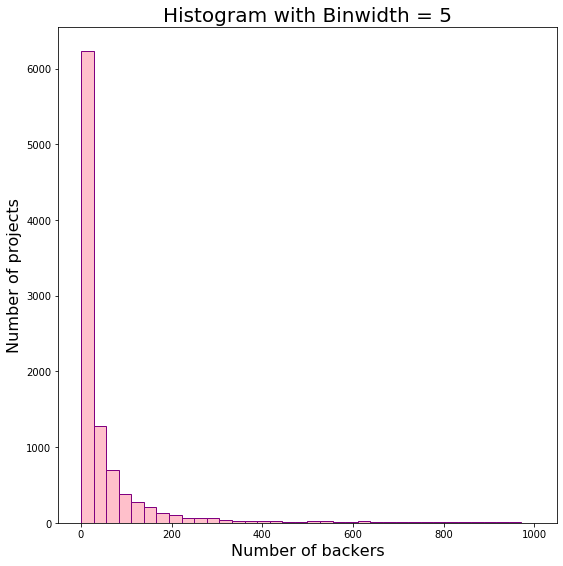

In [59]:
# Show 4 different binwidths
fig = plt.figure(figsize=(15,15))

df=dataEssential[dataEssential["backers"]<1000]

for i, binwidth in enumerate([5]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(df["backers"], bins = int(180/binwidth),
             color = 'pink', edgecolor = 'purple')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 20)
    ax.set_xlabel('Number of backers', size = 16)
    ax.set_ylabel('Number of projects', size= 16)

plt.tight_layout()
plt.show()

Now, let's distinguish projects by categories

Text(0, 0.5, 'Number of projects')

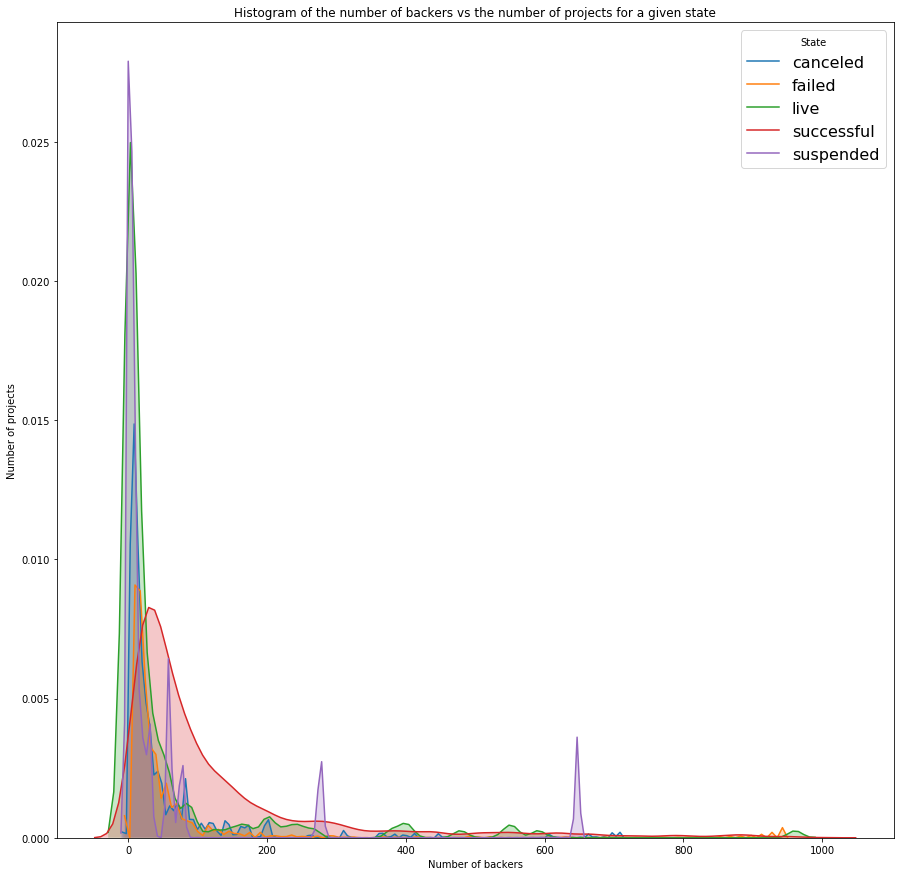

In [60]:
# List of five airlines to plot
states = ['canceled','failed','live','successful','suspended'] 
fig = plt.figure(figsize=(15,15))

# Iterate through the five states
for state in states:
    subset = df[df['state'] == state]
    sns.distplot(subset['backers'], hist = False, kde = True, kde_kws = {'shade': True}, label = state)

# Plot formatting
plt.legend(prop={'size': 16}, title = 'State')
plt.title('Histogram of the number of backers vs the number of projects for a given state')
plt.xlabel('Number of backers')
plt.ylabel('Number of projects')


### Result

We notice first that the number of projects exponentially decreases when the number of backers increases. Then, when we separate projects by state, we notice that successful projects have a higher number of backers on average. Anecdotally, we observe more irregularities in the distribution of suspended projects.

# Density plots

## Scatter Matrix

### Display

Let us try one more time to display the scatter matrix of the essential data, with our new dataframe.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDAA532DA0>,
      dtype=object)

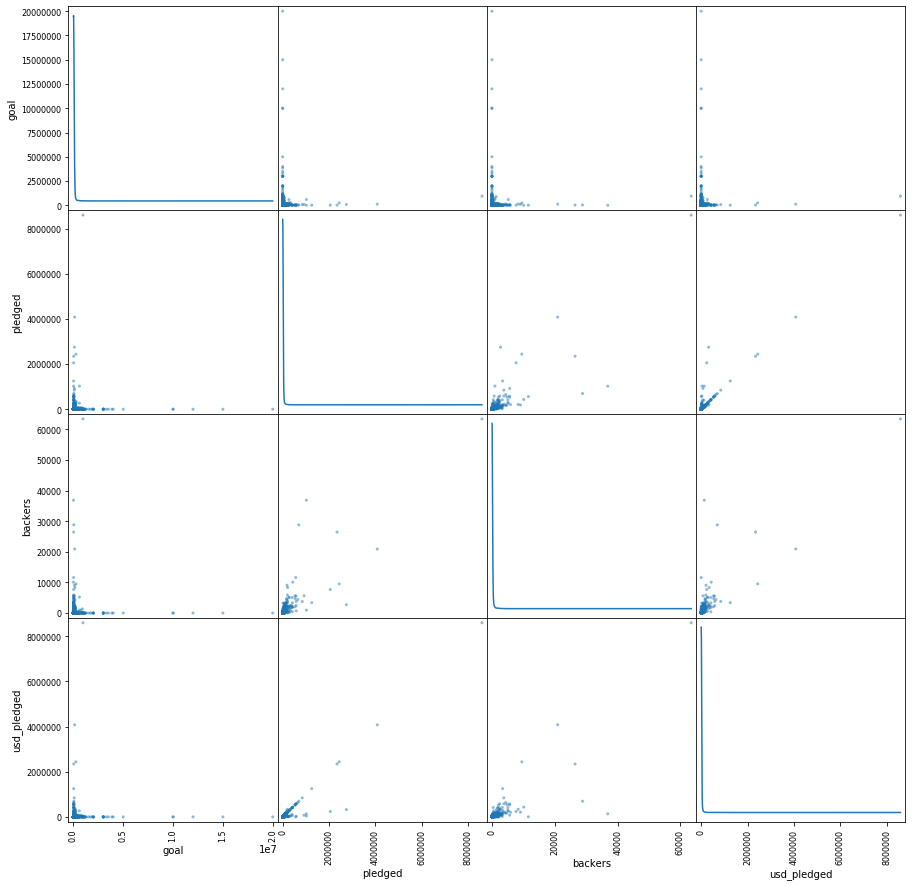

In [61]:
from pandas.plotting import scatter_matrix as sm

sm(dataEssential,diagonal='kde',figsize=(15,15))

### Result

The only interesting graph, is the one displaying the number of backers vs the amount pledged. The scatter dots seem to form a linear curve at first. However, it is more eloquent to resume displaying plots like before, feature by feature.

## Goal

### Display

We'll display the density curve of the amount pledged versus how often it was pledged.

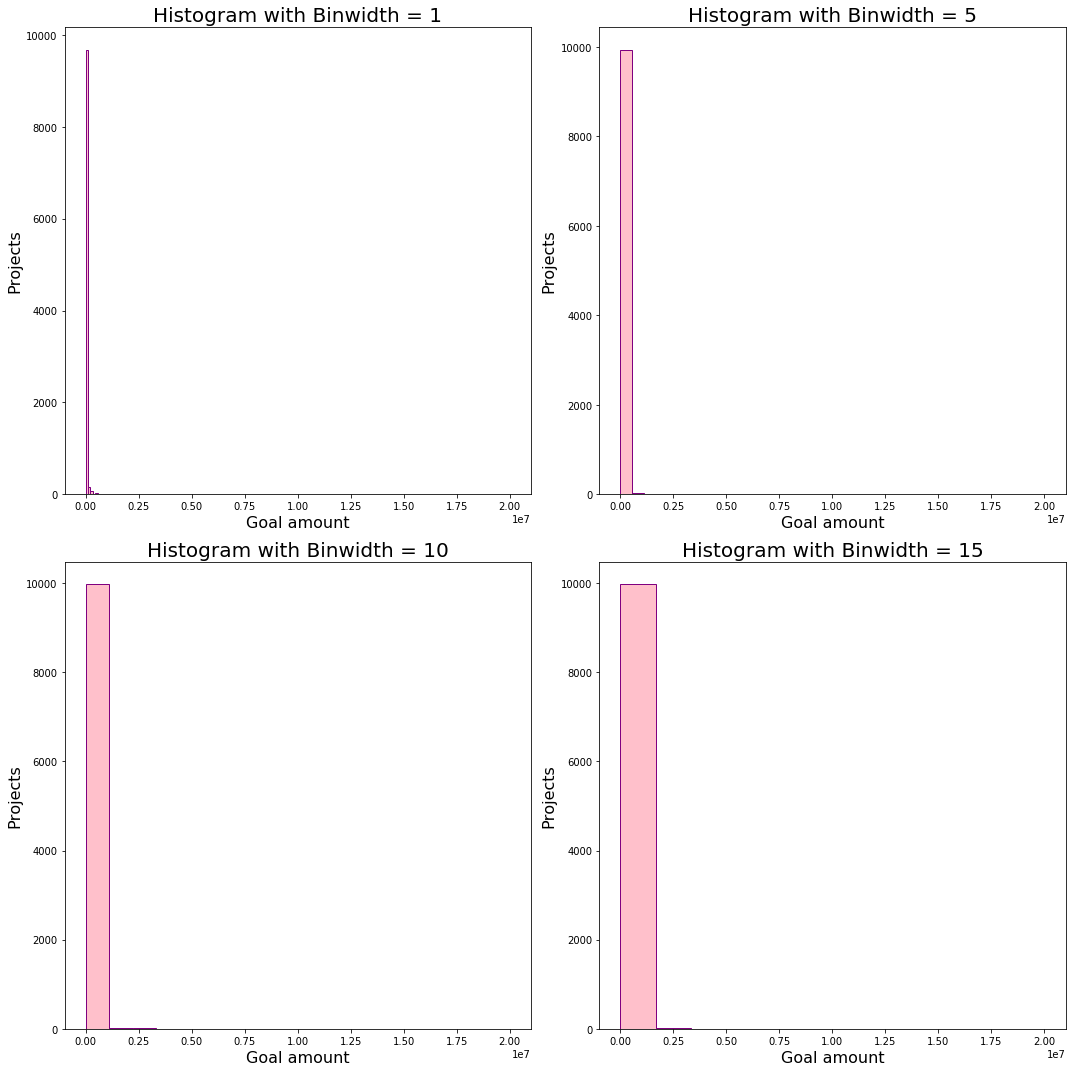

In [62]:
# Show 4 different binwidths
fig = plt.figure(figsize=(15,15))

for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(dataEssential["goal"], bins = int(180/binwidth),
             color = 'pink', edgecolor = 'purple')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 20)
    ax.set_xlabel('Goal amount', size = 16)
    ax.set_ylabel('Projects', size= 16)

plt.tight_layout()
plt.show()

We realize that we should cut excessively high values for goal amounts.

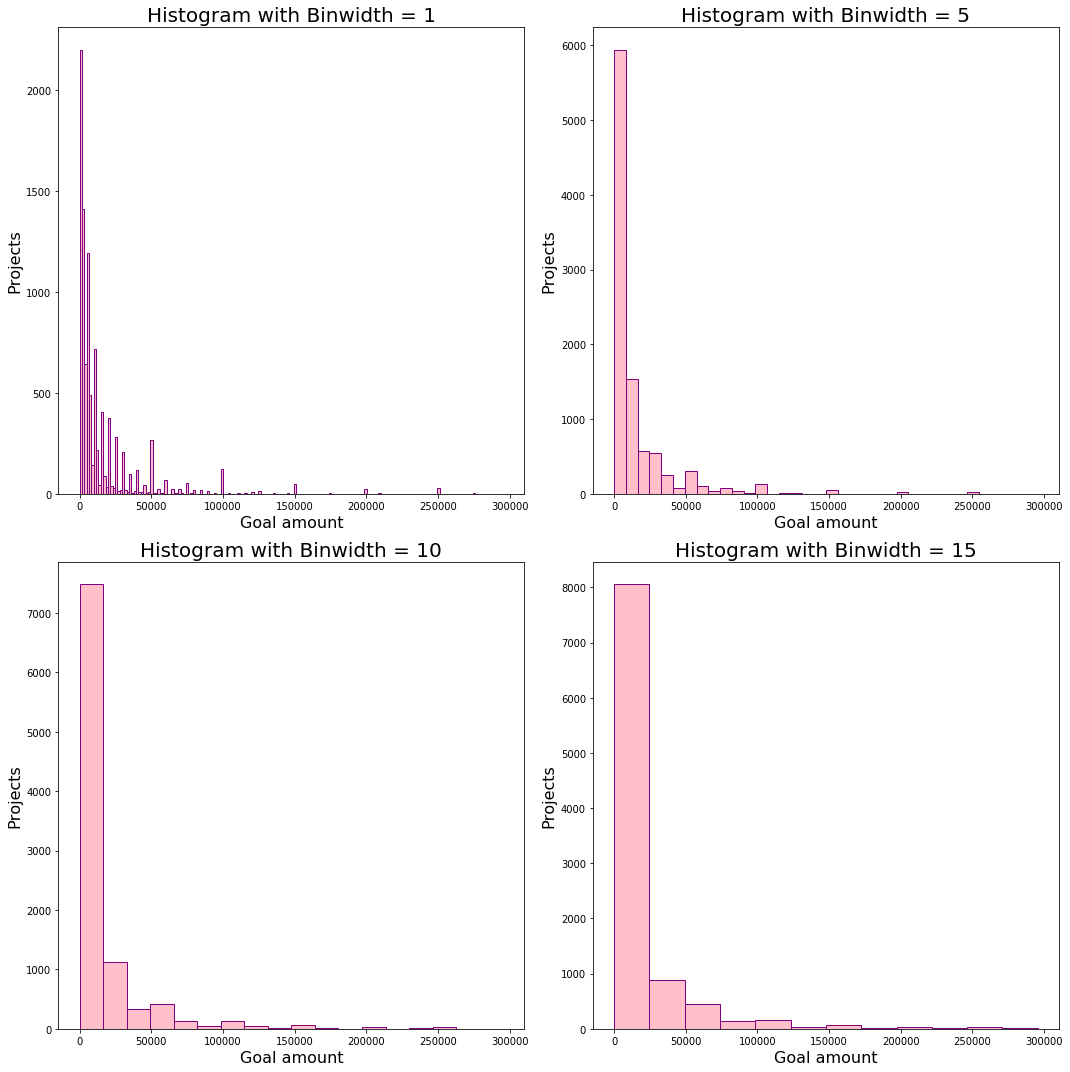

In [63]:
df=dataEssential.loc[dataEssential['goal'] < 300000]

# Show 4 different binwidths
fig = plt.figure(figsize=(15,15))

for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(df['goal'], bins = int(180/binwidth),color = 'pink', edgecolor = 'purple')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 20)
    ax.set_xlabel('Goal amount', size = 16)
    ax.set_ylabel('Projects', size= 16)

plt.tight_layout()
plt.show()

Let's try and display the same data but as density curves.

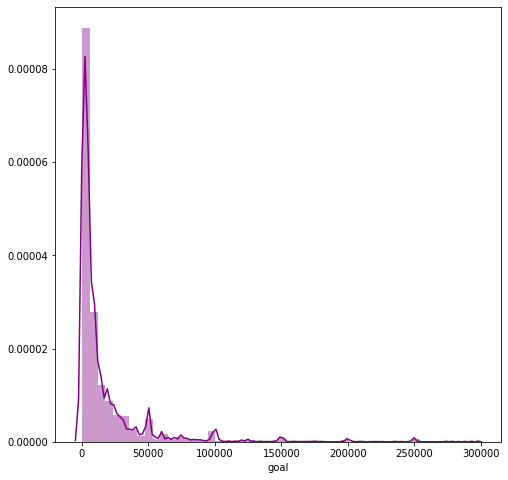

In [64]:
import seaborn as sns

fig = plt.figure(figsize=(8,8))
sns.distplot(df['goal'], color = 'purple')

We can easily see that most of the projects on Kickstarter claim relatively small amounts of money, that rarely exceed 50k$. 
Now, we should try and plot the goal amount vs the state of the project. More precisely, we should have a density function for each state.

Text(0, 0.5, 'Density')

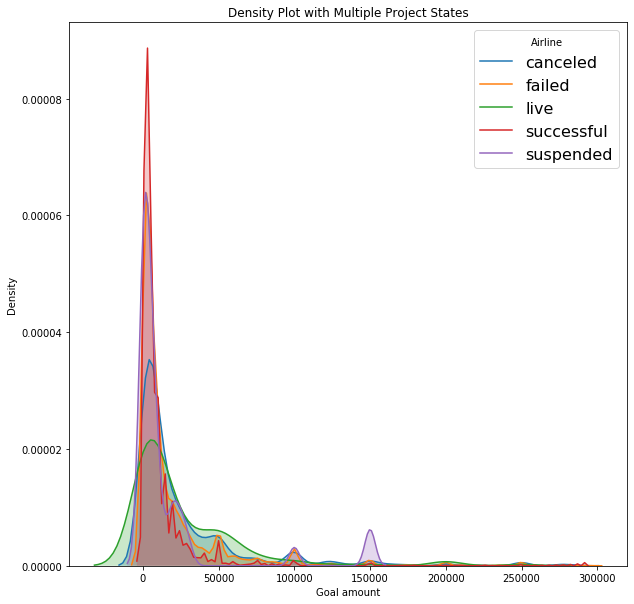

In [65]:
# List of five project states to plot
states =  ['canceled','failed','live','successful','suspended'] 

fig=plt.figure(figsize=(10,10))

# Iterate through the five airlines
for state in states:
    # Subset to the airline
    subset = df[df['state'] == state]
    
    # Draw the density plot
    sns.distplot(subset['goal'], hist = False, kde = True, kde_kws = {'shade': True}, label = state)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Project States')
plt.xlabel('Goal amount')
plt.ylabel('Density')

### Results 

This plot does not display an obvious correlation between the goal amount and the current status of a given project. 

## USD pledged

### Display

Now, we plot the link between the amount pledged (in USD, otherwise the comparison would be inacurate) and the current status of the project.

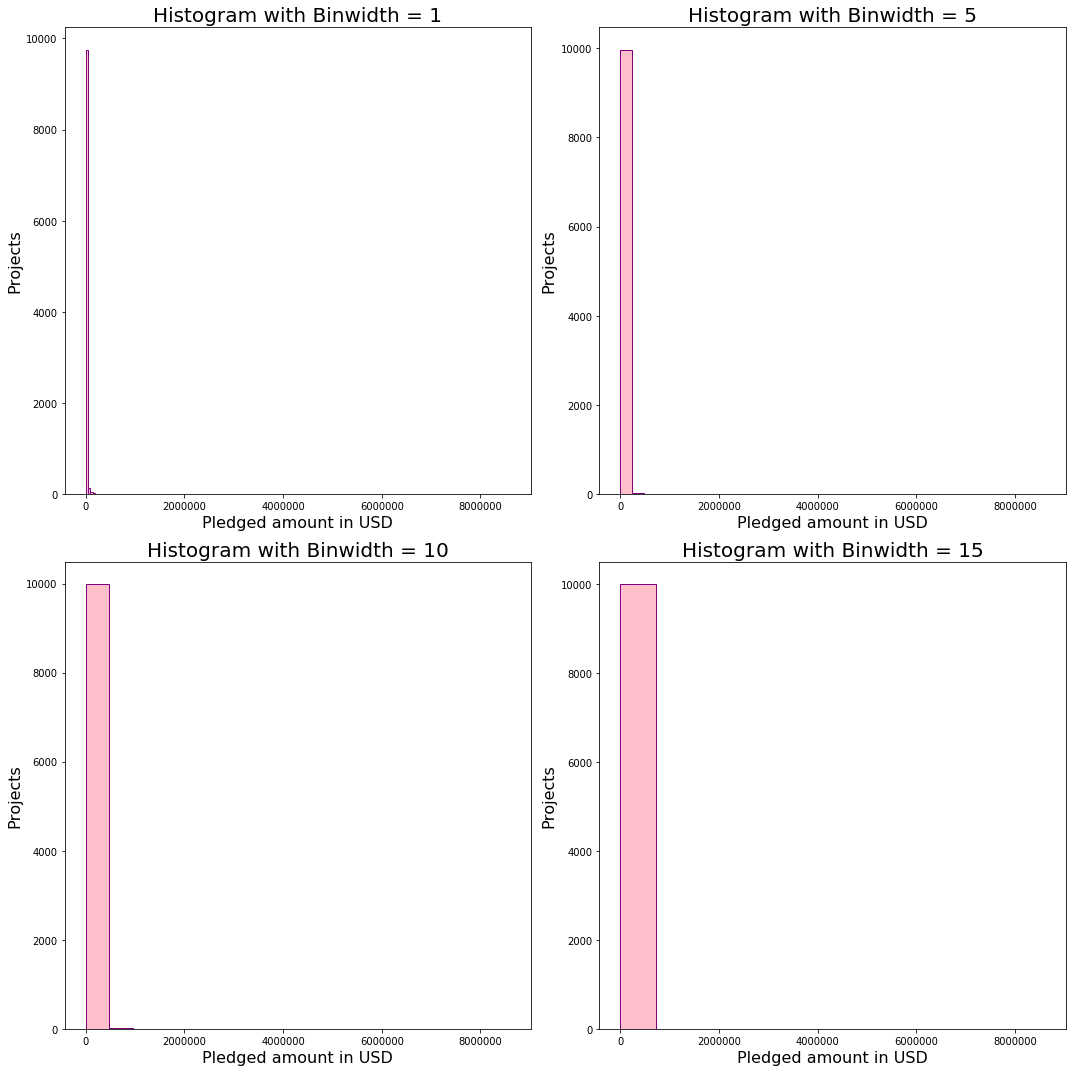

In [66]:
# Show 4 different binwidths
fig = plt.figure(figsize=(15,15))

for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(dataEssential["usd_pledged"], bins = int(180/binwidth),
             color = 'pink', edgecolor = 'purple')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 20)
    ax.set_xlabel('Pledged amount in USD', size = 16)
    ax.set_ylabel('Projects', size= 16)

plt.tight_layout()
plt.show()

Like before, we should troncate the values...

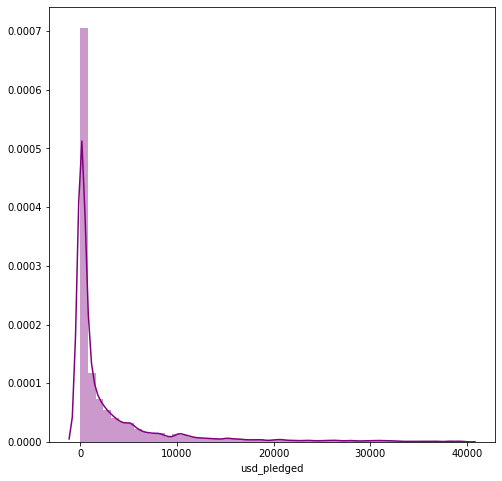

In [67]:
df=dataEssential.loc[dataEssential['usd_pledged'] < 40000]

fig = plt.figure(figsize=(8,8))
sns.distplot(df['usd_pledged'], color = 'purple')

Text(0, 0.5, 'Density')

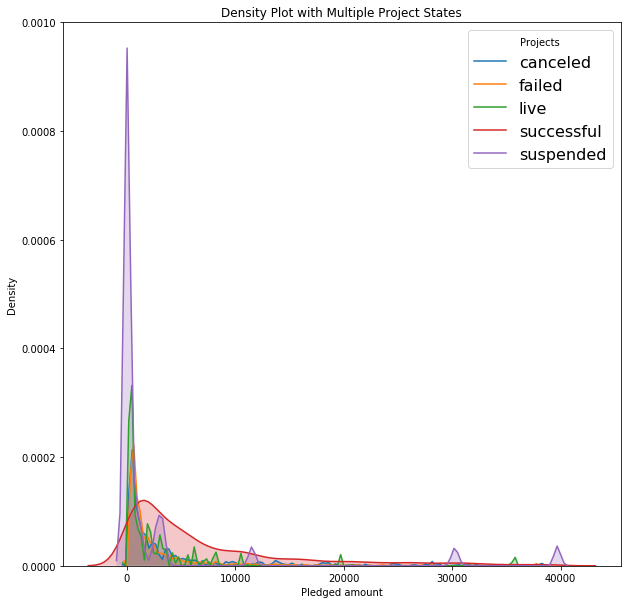

In [68]:
# List of five airlines to plot
states = ['canceled','failed','live','successful','suspended'] 

fig=plt.figure(figsize=(10,10))

# Iterate through the five airlines
for state in states:
    # Subset to the airline
    subset = df[df['state'] == state]
    
    # Draw the density plot
    sns.distplot(subset['usd_pledged'], hist = False, kde = True,kde_kws = {'shade': True},label = state)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Projects')
plt.title('Density Plot with Multiple Project States')
plt.xlabel('Pledged amount')
plt.ylabel('Density')

Now we see a tiny difference with successful projects. They tend to raise more funds than others. However, it would be even more striking to display a density plot based on the ratio $\frac{pledged}{goal}$

D:\Programmes files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Density')

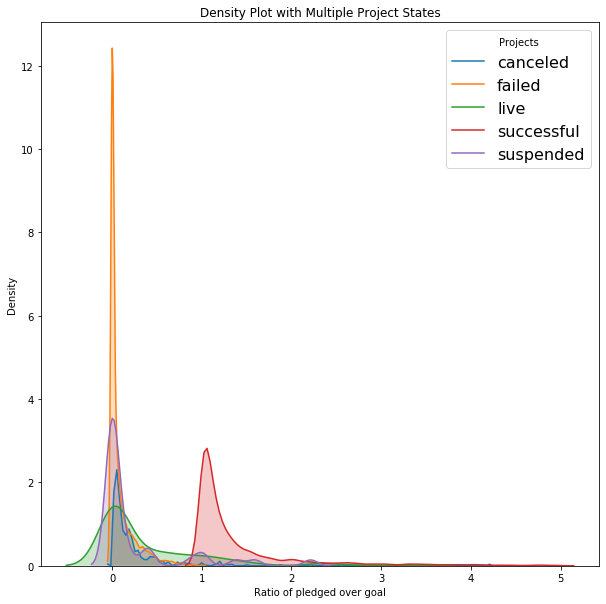

In [69]:
fig=plt.figure(figsize=(10,10))

dataEssential['ratio pledged']=dataEssential["pledged"]/dataEssential["goal"]
df=dataEssential[dataEssential['ratio pledged']<5]

# Iterate through the five airlines
for state in states:
    # Subset to the airline
    subset = df[df['state'] == state]
    
    # Draw the density plot
    sns.distplot(subset['ratio pledged'], hist = False, kde = True,kde_kws = {'shade': True},label = state)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Projects')
plt.title('Density Plot with Multiple Project States')
plt.xlabel('Ratio of pledged over goal')
plt.ylabel('Density')

### Results

The distributions seem only reasonable, successful projects have a higher ratio. Otherwise they would not have succeeded. However, the maximum value for canceled project is a weeny bit better than for other failing projects.

## Campaign duration

### Display 

Just as before, we would love to see plot the duration of projects vs the number of projects, and then, to split projects by categories (failed, successful, ...)

In [70]:
print(data)

      Row number          ID  \
0              1  1000002330   
1              2  1000004038   
2              3  1000007540   
3              4  1000011046   
4              5  1000014025   
5              6  1000023410   
6              7  1000030581   
7              8  1000034518   
8              9   100004195   
9             10   100004721   
10            11   100005484   
11            12  1000055792   
12            13  1000056157   
13            14  1000064368   
14            15  1000064918   
15            16  1000068480   
16            17  1000070642   
17            18  1000071625   
18            19  1000072011   
19            20  1000082254   
20            21  1000087442   
21            22  1000091520   
22            23  1000102741   
23            24  1000103948   
24            25  1000104688   
25            26  1000104953   
26            27  1000115172   
27            28  1000117861   
28            29  1000120151   
29            30  1000120287   
...     

In [71]:
from datetime import datetime

# #Petit test pour comprendre comment récupérer la durée en jour d'une campagne

# b = datetime.strptime(data.loc[0,'deadline'].split()[0],"%Y-%m-%d")
# a = datetime.strptime(data.loc[0,'launched'].split()[0],"%Y-%m-%d")
# delta = (b-a)
# print(delta.days)

## On créé un nouveau dataframe qui ne comporte que les colonnes qui nous intéresse, y compris une nouvelle colonne 
## comportant la durée d'une campagne en jours

def timeDifference(x,y):
    """
    Input: two strings
    Output: int
    The function takes two dates in the format "%Y-%m-%d %H-%M-%S" and returns the time difference between these two dates in days
    """
    b=datetime.strptime(y.split()[0],"%Y-%m-%d")
    a=datetime.strptime(x.split()[0],"%Y-%m-%d")
    
    return (b-a).days
    

df=data[["launched","deadline","state"]]
df["duration"] = [timeDifference(x, y) for x, y in zip(df['launched'], df['deadline'])]

D:\Programmes files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


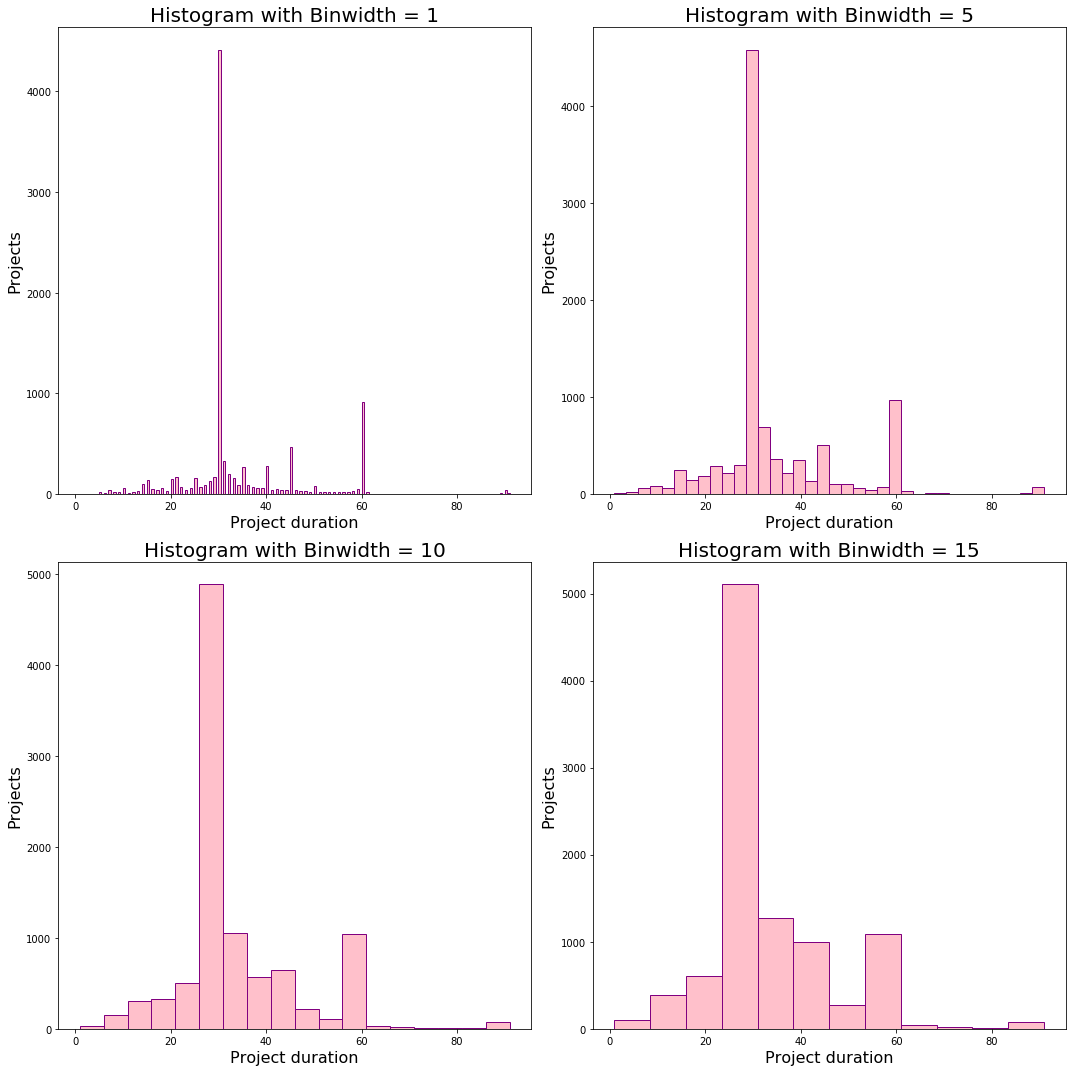

In [72]:
# Show 4 different binwidths
fig = plt.figure(figsize=(15,15))

for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(df[df["duration"]<100]["duration"], bins = int(180/binwidth),
             color = 'pink', edgecolor = 'purple')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 20)
    ax.set_xlabel('Project duration', size = 16)
    ax.set_ylabel('Projects', size= 16)

plt.tight_layout()
plt.show()

And now by category

Text(0, 0.5, 'Density')

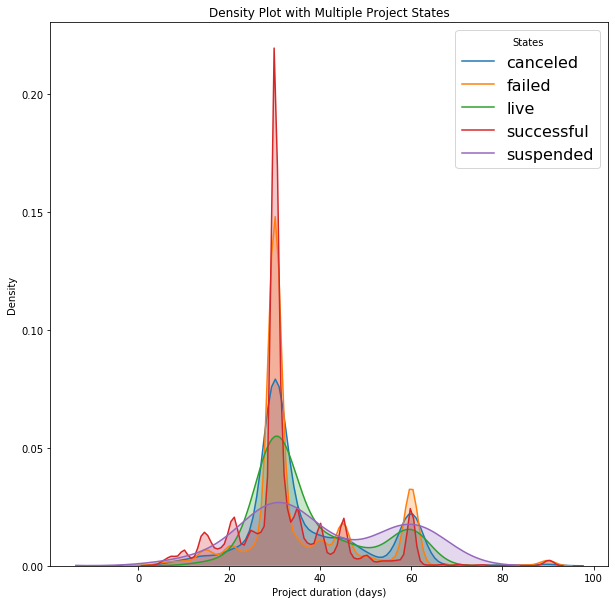

In [73]:
states = ['canceled','failed','live','successful','suspended'] 

fig=plt.figure(figsize=(10,10))

# Iterate through the five airlines
for state in states:
    # Subset to the airline
    df=df[df["duration"]<100]
    subset = df[df['state'] == state]
    
    # Draw the density plot
    sns.distplot(subset['duration'], hist = False, kde = True,kde_kws = {'shade': True},label = state)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'States')
plt.title('Density Plot with Multiple Project States')
plt.xlabel('Project duration (days)')
plt.ylabel('Density')

### Results

First, we can see to maxima on the first plot, at 30 and 60, which approximately correspond to 1 month and 2 months. It seems that some of Kickstarter users prefer to set durations in months.
Then, when taking a look at the second plot, we still see a high density of projects, grouped around 30 days. However, we can see that the density plot of successful projects is less regular than others. It subjects a greater variety of project durations. Maybe successful projects owners use more hindsight before setting their campaign deadline and take one that is better suited to their project.

## Summary

Let us display our main plots on a common graph

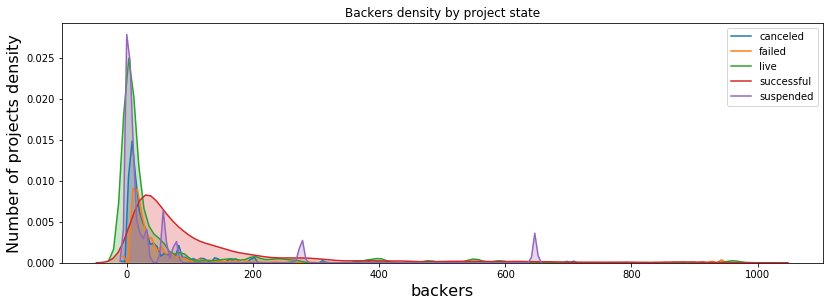

In [76]:
#We display the 6 main graphs 
fig = plt.figure(figsize=(30,15))
states = ['canceled','failed','live','successful','suspended'] 

#First plot
ax = plt.subplot(3, 2, 1)
ax.set_title('Backers density by project state')
ax.set_xlabel('Number of backers', size = 16)
ax.set_ylabel('Number of projects density', size= 16)

# Iterate through the five states
df=dataEssential[dataEssential["backers"]<1000]
for state in states:
    subset = df[df['state'] == state]
    sns.distplot(subset['backers'], hist = False, kde = True, kde_kws = {'shade': True}, label = state)


# # Plot formatting
# plt.legend(prop={'size': 16}, title = 'State')
# plt.title('Histogram of the number of backers vs the number of projects for a given state')
# plt.xlabel('Number of backers')
# plt.ylabel('Number of projects')

# #Second plot
# ax = plt.subplot(3, 2, 1)
# ax.set_title('Categories with the best success rates')
# ax.set_xlabel('Number of projects', size = 16)
# ax.set_ylabel('Category', size= 16)

# # Draw the last plot
# survey(dictBestCateg,['canceled','failed','live','successful','suspended'] )
# plt.show()



